In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import collections
import random
# from dataset import TextDataset
from torch.utils.data import DataLoader

%load_ext autoreload
%autoreload 2

In [3]:
data_dir = './data'
split_names = ['train']

### Unique characters and tokens
- num of unique characters
- num of unique words
- importance of case
- distribution of line lengths
- ratio of class labels

Split: train
['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x80', '\x83', '\x8a', '\x91', '\x92', '\x93', '\x94', '\x9a', '\x9c', '\x9d', '\x9e', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', '«', '¬', '®', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'À', 'Á', 'Â', 'Ã', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Í', 'Î', 'Ï', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ú', 'Ü', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'û', 'ü', '

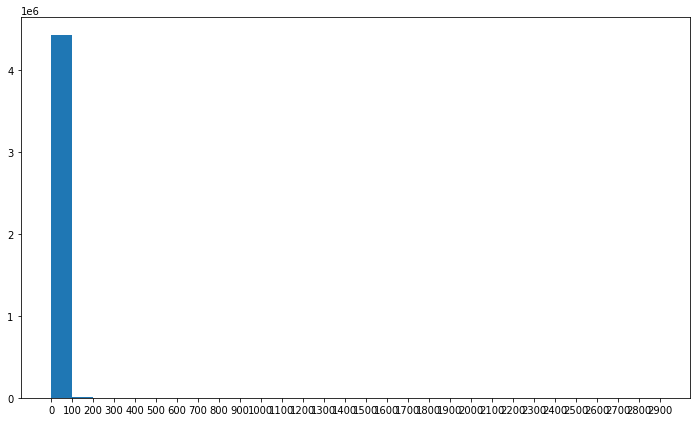

In [4]:
def show_line_length_stats(line_lengths):
    print('\nLine length stats:')
    print('* Min length: {}'.format(np.min(line_lengths)))
    print('* Mean length: {:.1f}'.format(np.mean(line_lengths)))
    max_line_len = np.max(line_lengths)
    print('* Max length: {}'.format(max_line_len))
    
    bins = range(0, max_line_len + 100, 100)
    hist = np.histogram(line_lengths, bins=bins)
    print()
    
    data = hist[0]
    print(data)
    plt.figure(figsize=(12, 7))
    plt.hist(line_lengths, bins=bins)
    plt.xticks(bins)
    plt.show()



for split_name in split_names:
    file_path = os.path.join(data_dir, '{}.src'.format(split_name))
    print('Split: {}'.format(split_name))

    with open(file_path, 'r') as f:
        text = f.read()

    alphabet = set(text)
    print(sorted(list(alphabet)))
    print('# of unique characters:\t{}'.format(len(alphabet)))

    lines = text.strip().split('\n')
    print('# of sentences:\t\t{}'.format(len(lines)))

    tokens = []
    line_lengths = []
    for line in lines:
        line_tokens = line.rstrip().split(' ')
        tokens.extend(line_tokens)
        line_lengths.append(len(line_tokens))

    print('# of unique tokens:\t{}'.format(len(set(tokens))))
    
    show_line_length_stats(line_lengths)
        
   
#     word_counter = collections.Counter([word.lower() for line in lines for word in line.split(' ')])

In [12]:
tokens

['Bangkok',
 ',',
 'Thailand',
 '(',
 'CNN',
 ')',
 '--',
 'Thousands',
 'of',
 'anti-government',
 'protesters',
 'defied',
 'an',
 'order',
 'Sunday',
 'to',
 'disperse',
 'from',
 'the',
 "capital's",
 'commercial',
 'center',
 ',',
 'but',
 'the',
 'government',
 'said',
 'it',
 'would',
 'use',
 'negotiation',
 '--',
 'not',
 'force',
 '--',
 'to',
 'get',
 'them',
 'to',
 'comply',
 '.',
 'In',
 'most',
 'years',
 'there',
 'is',
 'a',
 'modest',
 'gap',
 'between',
 'the',
 'two',
 'but',
 'last',
 'year',
 'the',
 'gap',
 'was',
 'Rmb1,200bn',
 'by',
 'the',
 'end',
 'of',
 'the',
 'year',
 '.',
 'An',
 'aggressive',
 'front-end',
 'treatment',
 'and',
 'those',
 'spiffy',
 '21',
 '-',
 'inch',
 '"',
 'Alpina',
 'Classic',
 '"',
 'wheels',
 'give',
 'this',
 'modified',
 '7',
 'Series',
 'a',
 'purposeful',
 'look',
 '.',
 'And',
 ',',
 'Gray',
 'says',
 'transition',
 'the',
 'is',
 'in',
 'injustice',
 '.',
 'James',
 'Gorman',
 ',',
 'who',
 'became',
 'chief',
 'executive',

In [2]:
with open('./data/train.lbl', 'r') as f:
    lines = f.readlines()
arr = [line.rstrip().split(' ') for line in lines]

arr_flat = []
for line in arr:
    arr_flat.extend(line)
    
arr_flat = np.array(arr_flat).astype(np.int)
num_replaced = np.sum((arr_flat > 0).astype(np.int))
num_total = len(arr_flat)

In [3]:
print(num_replaced)
print(num_total)

9948756
111650187
